**Project done by:**

*   Anna Kataeva gr. 1
*   Sofya Tsay gr. 1
*   Anton Shumakov gr. 5

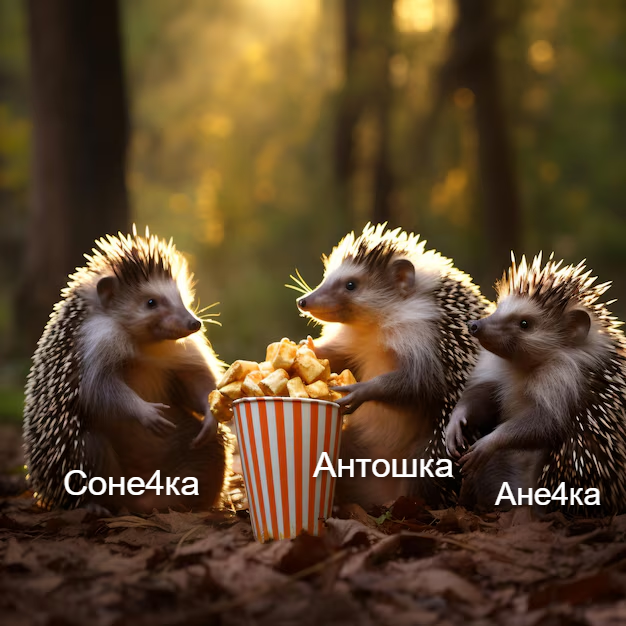

In [ ]:
# first, import some general libraries that are widely used throughout the whole notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing libraries be like:

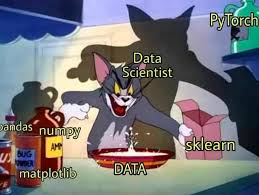

**1. [2] Take any time series of monthly or quarterly periodicity with seasonal pattern. Clearly describe the source you use.**

For our project we took data on monthly **share of influenza tests that were positive** throughout the world for the period between Jan 1, 2009 and Oct 1, 2024. The data was extracted manually from the [chart on the site](https://ourworldindata.org/influenza) on 10/12/2024.

In [ ]:
# # if you open the file from Jupyter Notebook please run the following cell
# data = pd.read_excel('DSE_project_data.xlsx')
# data

In [ ]:
# # if you open the file from GoogleColab please run the following 2 cells and upload the file
# import io
# from google.colab import files
# uploaded = files.upload()

Saving DSE_project_data.xlsx to DSE_project_data (2).xlsx


In [ ]:
# data = pd.read_excel(io.BytesIO(uploaded.get('DSE_project_data.xlsx')))
# data

,Date,Monthly share of positive tests
0,2009-01-01,21.14
1,2009-02-01,21.70
2,2009-03-01,18.20
3,2009-04-01,14.05
4,2009-05-01,19.95
...,...,...
185,2024-06-01,4.40
186,2024-07-01,4.00
187,2024-08-01,2.57
188,2024-09-01,2.01


**Data source:** FluNet by the World Health Organization.

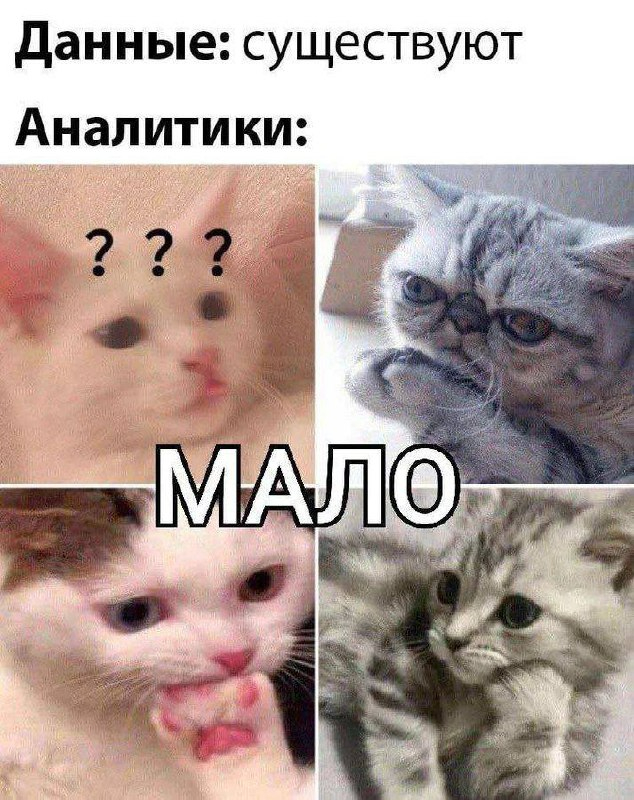

In [ ]:
# check if there are any missing values
data.isna().sum()

,0
Date,0
Monthly share of positive tests,0


**2. [10] Visualize the time series. Try to use different plot types.**

<Axes: title={'center': 'Influenza positive tests per month'}, xlabel='Month'>

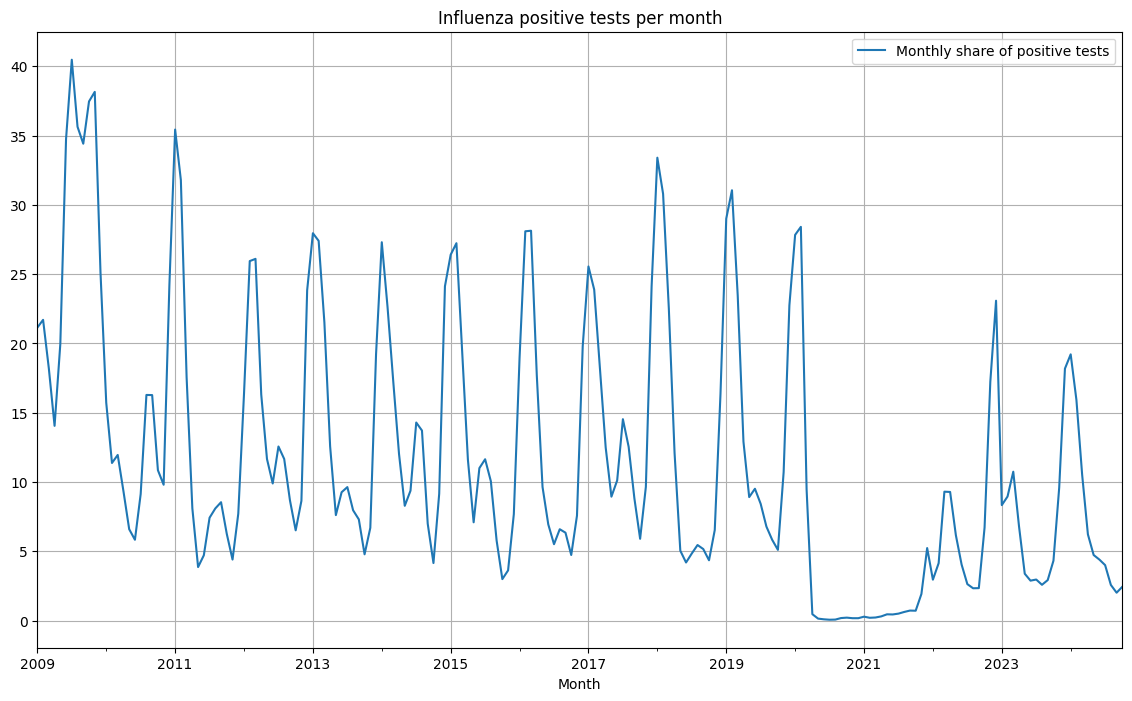

In [ ]:
# first, we visualize the time series on a regular graph

data.plot(x='Date', y='Monthly share of positive tests', grid=True, figsize=(14, 8), title='Influenza positive tests per month', xlabel='Month')

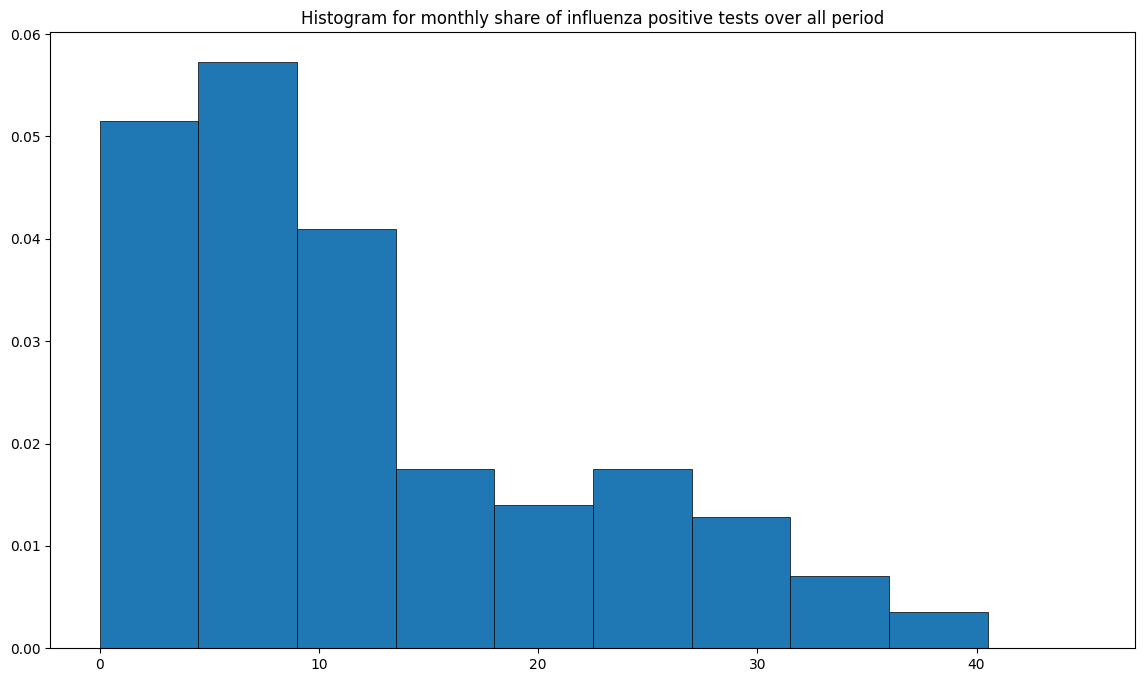

In [ ]:
# after that, we also look at some other types of graphs - histogram...

plt.figure(figsize=(14, 8))
plt.hist(x=data['Monthly share of positive tests'], bins=np.linspace(0, 45, 11), density=True, edgecolor="k", linewidth=0.5)
plt.title('Histogram for monthly share of influenza positive tests over all period')
plt.show()

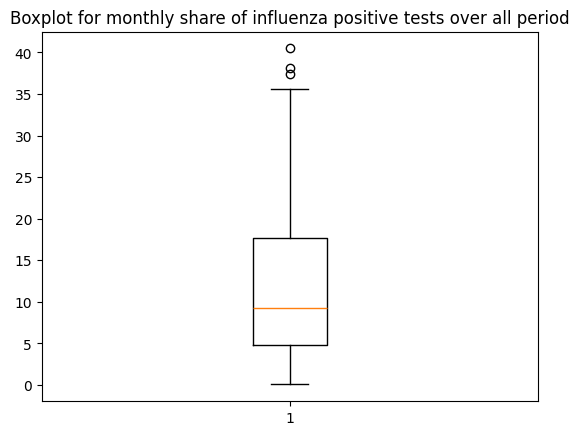

In [ ]:
# ...boxplot, ...
plt.boxplot([data['Monthly share of positive tests']])
plt.title('Boxplot for monthly share of influenza positive tests over all period')
plt.show()

<Axes: title={'center': 'Average number of positive tests per month'}, xlabel='Month'>

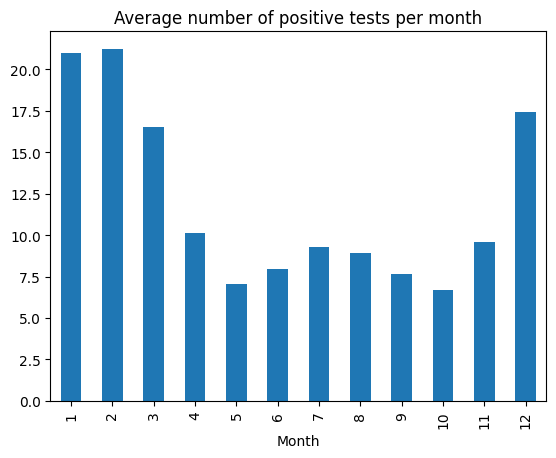

In [ ]:
# finally look at the distribution of share of positive tests by month
df=data
df['Month']=df['Date'].dt.month
df_grouped=df.groupby('Month')
# df_mean=df_grouped['Monthly share of positive tests'].sum()
df_avg=df_grouped['Monthly share of positive tests'].mean()
df_avg.plot(x='Month', y='Values', kind='bar', title='Average number of positive tests per month')

In [ ]:
# for more clear understanding, let's calculate some basic statistics for the dataset by months

basic_stat = pd.DataFrame({'average values': df_grouped['Monthly share of positive tests'].mean(),
                           'standard deviation': df_grouped['Monthly share of positive tests'].std(),
                           'max values': df_grouped['Monthly share of positive tests'].max(),
                           'min values': df_grouped['Monthly share of positive tests'].min(),
                           })
basic_stat

,average values,standard deviation,max values,min values
Month,,,,
1,20.989375,10.272282,35.43,0.28
2,21.217500,10.045687,31.78,0.20
3,16.535625,7.347866,28.13,0.22
4,10.140625,4.910897,17.70,0.30
5,7.026875,4.680461,19.95,0.14
6,7.963125,7.933305,34.75,0.09
7,9.286875,9.501638,40.47,0.06
8,8.931875,8.591636,35.63,0.07
9,7.643125,8.144983,34.41,0.18


Overall, by first examining the data, we can see that on average most frequently the share of positive influenza tests is around 10%. However, there is a certain seasonality of this time series - in autumn and winter months (November, December, January, February) there is a trend in rising mean values of shares of positive tests, maximal values also increase, while minimal values fall. We proceed with the consideration of different ways to forecast the share of positive influenza tests based on our dataset.


**3. [5] Decompose the time series into three components (trend, seasonal part, noise) and plot them. Here you may use ETS model or any other decomposition technique.**

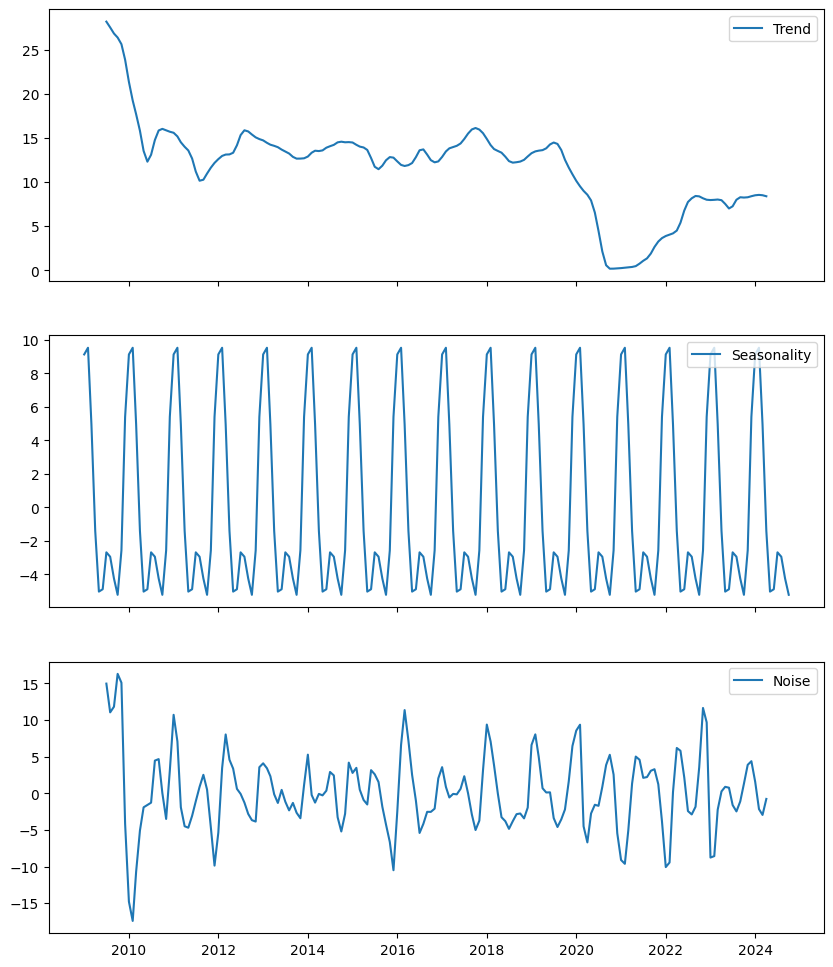

In [ ]:
# we use ETS model
df = data

# import the necessary library
from statsmodels.tsa.seasonal import seasonal_decompose

df_decomposition=seasonal_decompose(df['Monthly share of positive tests'], model='additive', period=12)
estimated_trend=df_decomposition.trend
estimated_seasonality=df_decomposition.seasonal
estimated_noise=df_decomposition.resid

fig, axes = plt.subplots(3, 1, sharex=True, sharey=False)
fig.set_figheight(12)
fig.set_figwidth(10)

axes[0].plot(df['Date'], estimated_trend, label='Trend')
axes[0].legend(loc='upper right')
axes[1].plot(df['Date'], estimated_seasonality, label='Seasonality')
axes[1].legend(loc='upper right')
axes[2].plot(df['Date'], estimated_noise, label='Noise')
axes[2].legend(loc='upper right')

# When you was coding the easiest thing for an hour:


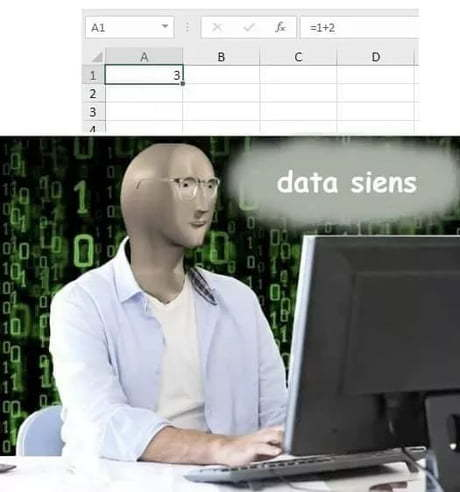

**Split your time series into train and test parts.**

In [ ]:
# Determine the split point for training and test sets (80% for training, 20% for testing)
split_point = int(len(data) * 0.8)

# Splitting data into traininng and test sets
train = data.iloc[:split_point]
test = data.iloc[split_point:]

**4. [10] Make forecasts using Random Forest or Gradient Boosting.
Clearly describe the features you create. You may use any additional predictors.**

In [ ]:
data_boost = data

# We introduce the following features: shares of positive influenza tests in the previous 2 months
for i in range(1, 3):
    data_boost[f'y _ (t-{i})'] = data_boost['Monthly share of positive tests'].shift(i)

data_boost = data_boost.dropna() # since we shifted the values, in the first 2 observations some values are missing, for correct gradient boosting prediction we delete them
data_boost = data_boost.reset_index()
data_boost = data_boost.drop(columns=['index'])

# once again, we split the data for making Gradient Boosting prediction, paying attention that we shifted and dropped some of the observations
split_point = int(len(data) * 0.8)
train_boost = data_boost.iloc[:split_point]
test_boost = data_boost.iloc[split_point:]

X_train = train_boost.drop(['Monthly share of positive tests'], axis=1)
y_train = train_boost['Monthly share of positive tests']
X_test = test_boost.drop(['Monthly share of positive tests'], axis=1)
y_test = test_boost['Monthly share of positive tests']

# import the necessary library
from sklearn.ensemble import GradientBoostingRegressor

Gradient_Boosting = GradientBoostingRegressor(n_estimators=100, random_state=1)
Gradient_Boosting.fit(X_train[['y _ (t-1)', 'y _ (t-2)']], y_train)
boost_predictions = Gradient_Boosting.predict(X_test[['y _ (t-1)', 'y _ (t-2)']])

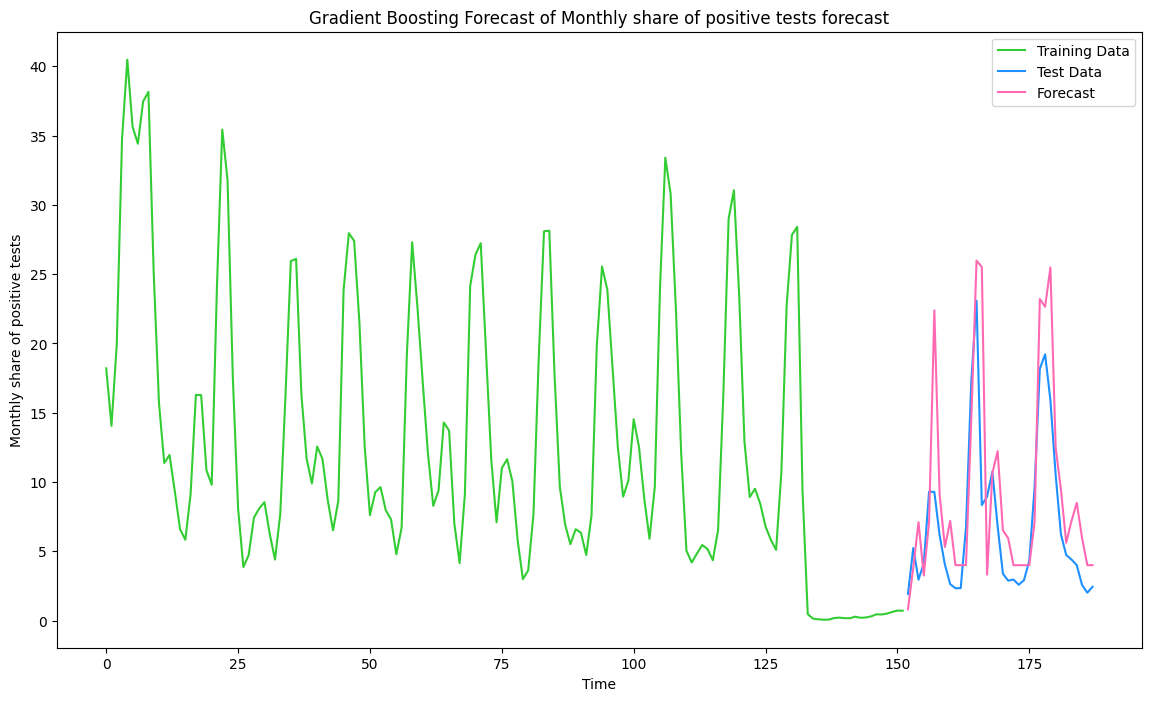

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(train_boost.index, train_boost['Monthly share of positive tests'], label='Training Data', color = 'limegreen')
plt.plot(test_boost.index, test_boost['Monthly share of positive tests'], label='Test Data', color = 'dodgerblue')
plt.plot(test_boost.index, boost_predictions, label='Forecast', color = 'hotpink')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Monthly share of positive tests')
plt.title('Gradient Boosting Forecast of Monthly share of positive tests forecast')

plt.show()

In [ ]:
# Introduce some metrics (MSE, MAE, MAPE) to measure how 'good' our prediction was, and further we will compare these merics for diff approaches
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse_boost = mean_squared_error(y_test, boost_predictions)
mae_boost = mean_absolute_error(y_test, boost_predictions)
mape_boost = mean_absolute_percentage_error(y_test, boost_predictions)

# we will use it a bit later...

# When the code finally works:


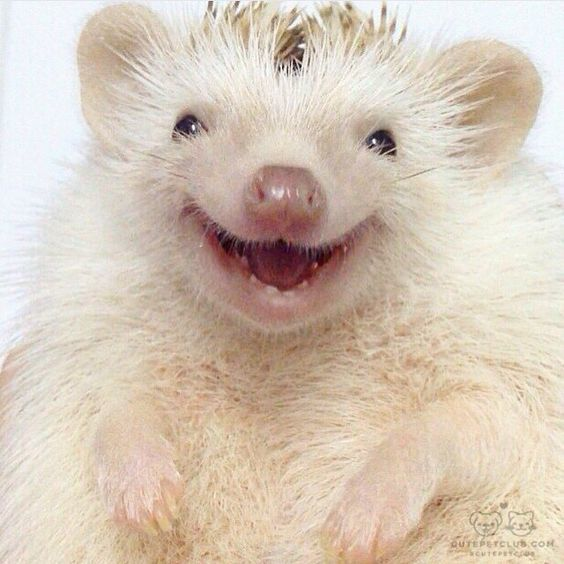

**5. [10] Make forecasts using appropriate model of ETS class.**

In [ ]:
data_ETS = data

# split the data
split_point = int(len(data_ETS) * 0.8)
train = data_ETS.iloc[:split_point]
test = data_ETS.iloc[split_point:]

# import the necessary library
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

# Make fitted ETS model using the training set
model_ETS = ETSModel(train['Monthly share of positive tests'], error='add', damped_trend=0, seasonal='add', seasonal_periods=12)
fitted_model = model_ETS.fit()

# Forecast the same length as the test set
forecast = fitted_model.forecast(steps=len(test))

# Add the forecasted values to the corresponding datetime index for plotting
forecast_indexed = pd.Series(forecast, index=test.index)

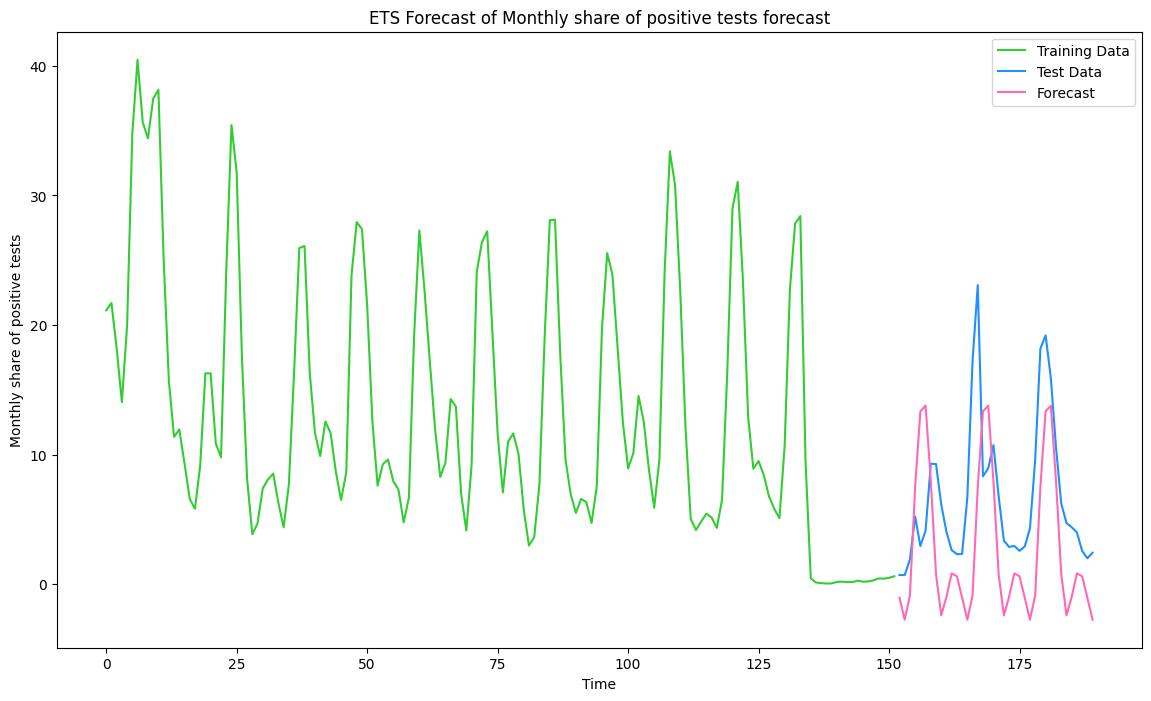

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(train['Monthly share of positive tests'], label='Training Data', color = 'limegreen')
plt.plot(test['Monthly share of positive tests'], label='Test Data', color='dodgerblue')
plt.plot(forecast_indexed, label='Forecast', color='hotpink')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Monthly share of positive tests')
plt.title('ETS Forecast of Monthly share of positive tests forecast')

plt.show()

# When you searched for an error in the code for an hour, and it turned out that you should have replaced 1 with 0:


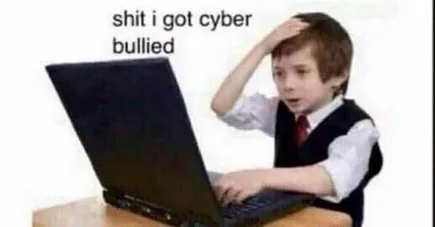

In [ ]:
mse_ETS = mean_squared_error(test['Monthly share of positive tests'], forecast)
mae_ETS = mean_absolute_error(test['Monthly share of positive tests'], forecast)
mape_ETS = mean_absolute_percentage_error(test['Monthly share of positive tests'], forecast)

**6. [10 + 5 bonus for something extraordinary] Surprise me part! Make forecasts using any statistical model or machine learning algorithm of your choice. Try to be creative!**

In [ ]:
# we use Prophet - time series forecasting model developed by Meta

!pip install prophet

# We could also use:

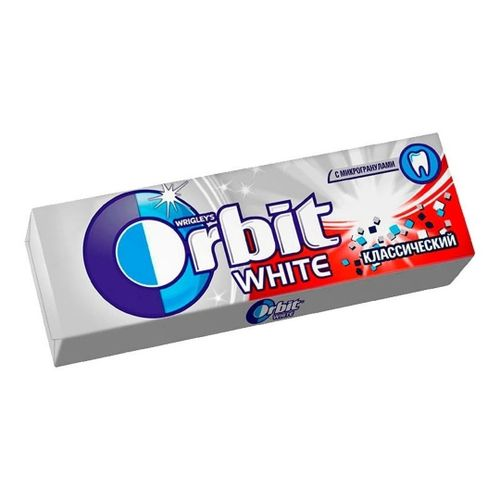

In [ ]:
# importing the necessary library
from prophet import Prophet

# Renaming columns as required by Prophet
data_prophet = data.rename(columns={'Date': 'ds', 'Monthly share of positive tests': 'y'})

# Creating an object of the Prophet class and we train it
m = Prophet()
m.fit(data_prophet)

# Creating a data frame that contains all the historical time points and another days for which we wanted to make a forecast. Here we obtained periods = 0, since our prediction days are already in data.
future = m.make_future_dataframe(periods=0)

# Forecast
forecast = m.predict(future)

# Prophet returns a dataframe with several columns, but we're mainly interested in 'ds', 'yhat', 'yhat_lower', and 'yhat_upper'. 'yhat' is the predicted value

# Determine the split point for training and test sets (80% for training, 20% for testing)
# Splitting data into traininng and test sets
split_index = int(len(data_prophet) * 0.8)
data_prophet_train = data_prophet.loc[:split_index]
data_prophet_test = data_prophet.loc[split_index:]

# Compare actual and predicted values for the test set
y_true = data_prophet_test['y'].values
prophet_predictions = forecast.loc[split_index:, 'yhat'].values

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw73kup4d/a5e8ugjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw73kup4d/0v4h06h4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74894', 'data', 'file=/tmp/tmpw73kup4d/a5e8ugjz.json', 'init=/tmp/tmpw73kup4d/0v4h06h4.json', 'output', 'file=/tmp/tmpw73kup4d/prophet_model1s4r7elf/prophet_model-20241219084509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:45:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:45:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


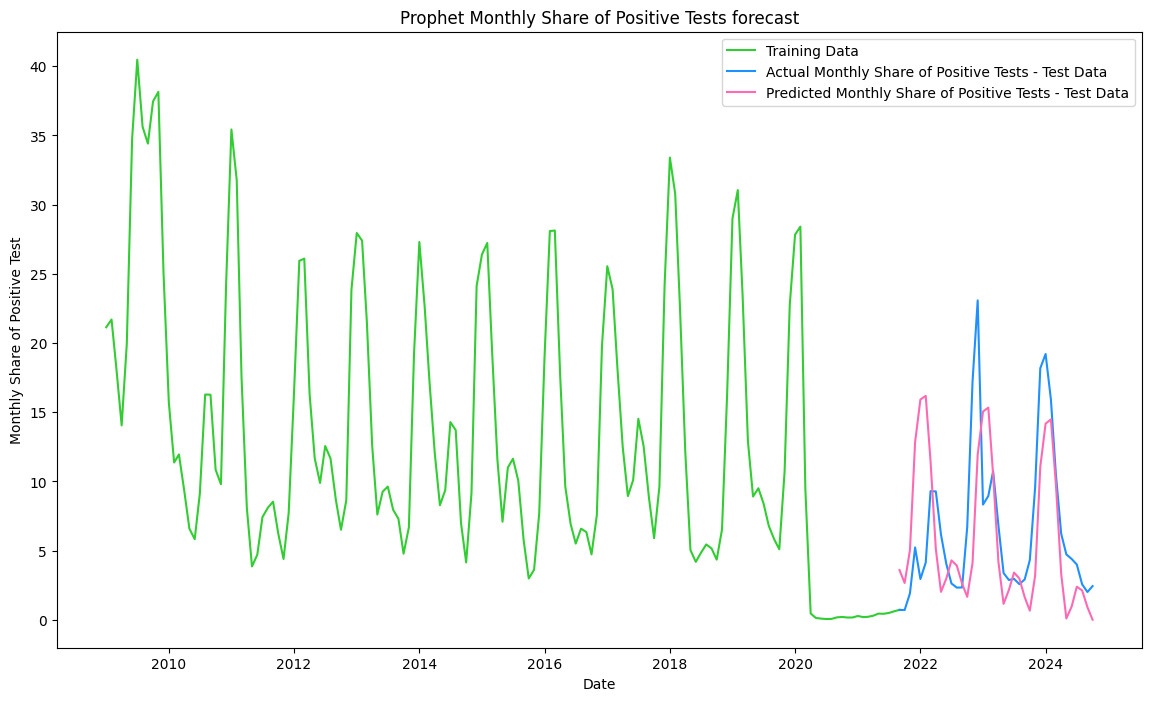

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(data_prophet_train['ds'], data_prophet_train['y'], label='Training Data', color='limegreen')
plt.plot(data_prophet_test['ds'], data_prophet_test['y'], label='Actual Monthly Share of Positive Tests - Test Data', color='dodgerblue')
plt.plot(data_prophet_test['ds'], prophet_predictions, label='Predicted Monthly Share of Positive Tests - Test Data', color='hotpink')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Monthly Share of Positive Test')
plt.title('Prophet Monthly Share of Positive Tests forecast')

plt.show()

In [ ]:
mse_prophet = mean_squared_error(y_true, prophet_predictions)
mae_prophet = mean_absolute_error(y_true, prophet_predictions)
mape_prophet = mean_absolute_percentage_error(y_true, prophet_predictions)

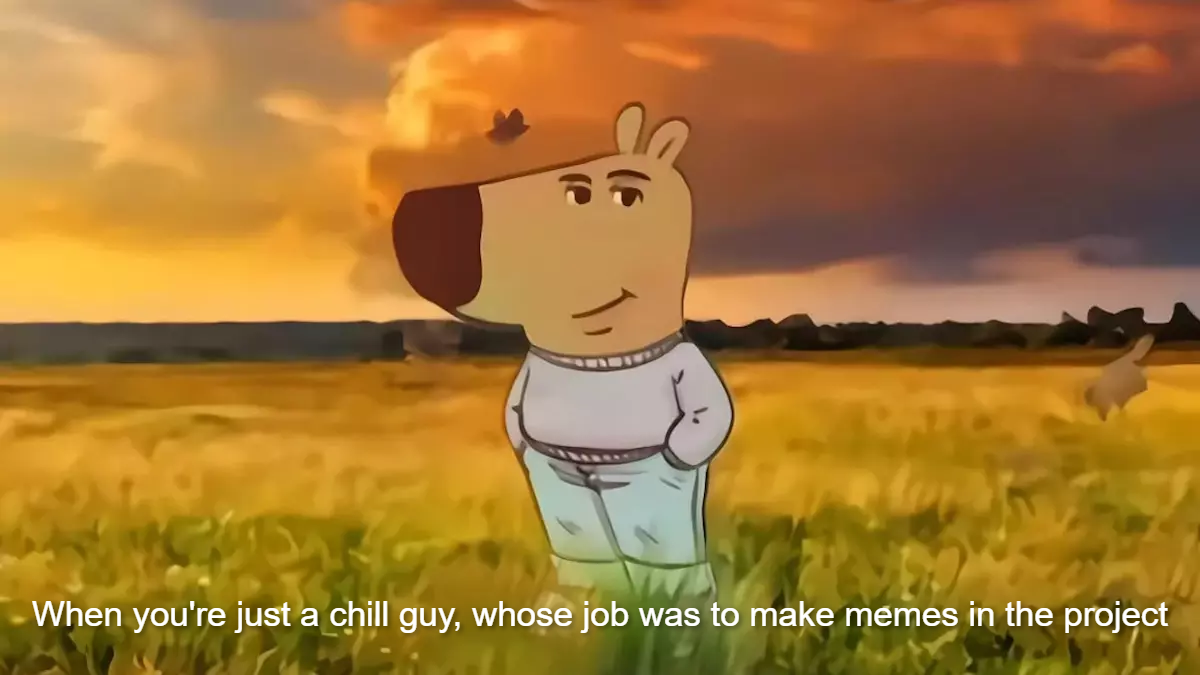

**7. [3] Compare the three approaches by the forecast quality on the test set. Choose the best approach.**

In [ ]:
# summarizing calcuated metrics for comparing the obtained results

metrics = {'MSE': [mse_boost, mse_ETS, mse_prophet],
           'MAE': [mae_boost, mae_ETS, mae_prophet],
           'MAPE': [mape_boost, mape_ETS, mape_prophet]
           }

final = pd.DataFrame(metrics, index=['Gradient Boosting', 'ETS', 'Prophet'])
final

,MSE,MAE,MAPE
Gradient Boosting,23.145642,3.402950,0.624925
ETS,45.238586,5.525555,1.200987
Prophet,27.502013,3.866219,0.853753


By all three metrics, **Gradient Boosting** is the most precise forecasting method.

# FINALLY

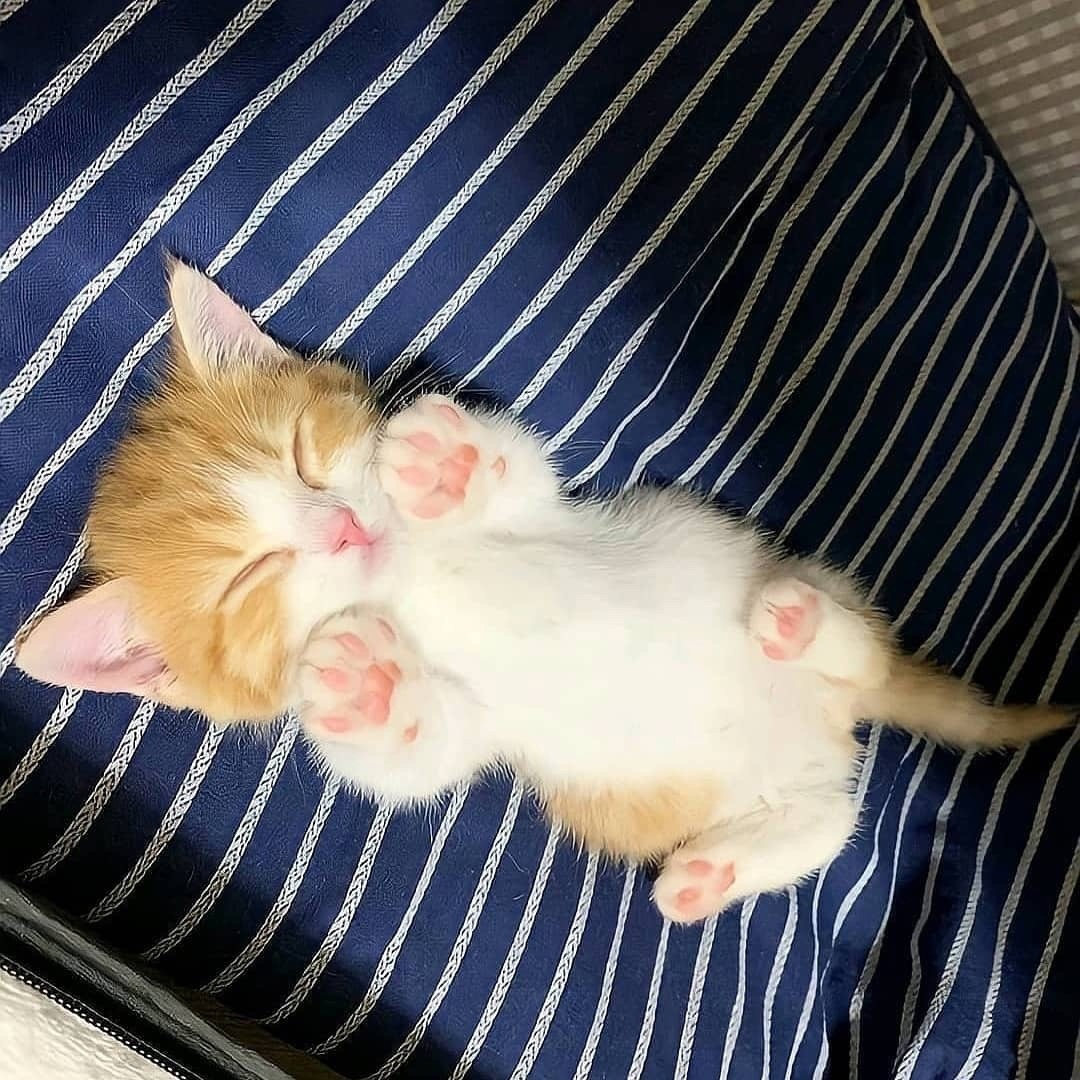